# Assignment: 1

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('Cricket.csv', encoding='cp1252')
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [4]:
prep_df=df[['Ave', 'SR']]
scaler=StandardScaler()
prep_df=scaler.fit_transform(prep_df)
prep_df=pd.DataFrame(prep_df)
prep_df.columns=['Ave', 'SR']
prep_df

,Ave,SR
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000
...,...,...
74,1.106299,-1.457604
75,0.829159,-0.562275
76,-0.537836,-0.234765
77,0.208570,1.332823


In [5]:
k_means=KMeans(n_clusters=4, init='k-means++', n_init=50)
k_means.fit(prep_df)
df['Cluster']= k_means.labels_
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Cluster
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,3
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,0
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,0
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,2


In [17]:
df[df['Cluster']== 0]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Cluster
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,0
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,0
5,Inzamam-ul-Haq (Asia/PAK),1991-2007,378,350,53,11739,137*,39.52,15812,74.24,10,83,20,0
6,JH Kallis (Afr/ICC/SA),1996-2014,328,314,53,11579,139,44.36,15885,72.89,17,86,17,0
7,SC Ganguly (Asia/INDIA),1992-2007,311,300,23,11363,183,41.02,15416,73.70,22,72,16,0
8,R Dravid (Asia/ICC/INDIA),1996-2011,344,318,40,10889,153,39.16,15284,71.24,12,83,13,0
9,BC Lara (ICC/WI),1990-2007,299,289,32,10405,169,40.48,13086,79.51,19,63,16,0
11,Mohammad Yousuf (Asia/PAK),1998-2010,288,273,40,9720,141*,41.71,12942,75.10,15,64,15,0
18,Saeed Anwar (PAK),1989-2003,247,244,19,8824,194,39.21,10938,80.67,20,43,15,0
19,S Chanderpaul (WI),1994-2011,268,251,40,8778,150,41.60,12408,70.74,11,59,6,0


# Assignment 2

In [18]:
prep_df.head()

,Ave,SR
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000


In [26]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

In [28]:
help(cut_tree)

Help on function cut_tree in module scipy.cluster.hierarchy:

cut_tree(Z, n_clusters=None, height=None)
    Given a linkage matrix Z, return the cut tree.
    
    Parameters
    ----------
    Z : scipy.cluster.linkage array
        The linkage matrix.
    n_clusters : array_like, optional
        Number of clusters in the tree at the cut point.
    height : array_like, optional
        The height at which to cut the tree. Only possible for ultrametric
        trees.
    
    Returns
    -------
    cutree : array
        An array indicating group membership at each agglomeration step. I.e.,
        for a full cut tree, in the first column each data point is in its own
        cluster. At the next step, two nodes are merged. Finally, all
        singleton and non-singleton clusters are in one group. If `n_clusters`
        or `height` are given, the columns correspond to the columns of
        `n_clusters` or `height`.
    
    Examples
    --------
    >>> from scipy import cluster
 

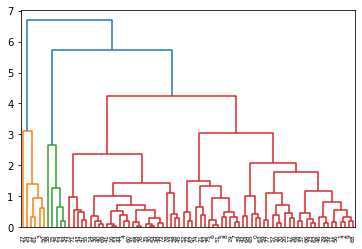

In [27]:
merging=linkage(prep_df, method='complete', metric='euclidean')
dendrogram(merging)
plt.show()

In [30]:
lab=cut_tree(merging, n_clusters=4).reshape(-1, )
lab

array([0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 3, 2, 3, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 3, 0, 1, 2, 0, 2, 2, 0, 2, 3, 2, 2, 0, 3, 0, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2])

In [31]:
df['Clust']=lab
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Cluster,Clust
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,3,0
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,0,0
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,0,0
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1,1
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3,0,0
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6,0,0
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7,2,2
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15,1,0


In [34]:
df[df['Clust']==0]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Cluster,Clust
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,3,0
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,0,0
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,0,0
5,Inzamam-ul-Haq (Asia/PAK),1991-2007,378,350,53,11739,137*,39.52,15812,74.24,10,83,20,0,0
6,JH Kallis (Afr/ICC/SA),1996-2014,328,314,53,11579,139,44.36,15885,72.89,17,86,17,0,0
7,SC Ganguly (Asia/INDIA),1992-2007,311,300,23,11363,183,41.02,15416,73.70,22,72,16,0,0
8,R Dravid (Asia/ICC/INDIA),1996-2011,344,318,40,10889,153,39.16,15284,71.24,12,83,13,0,0
9,BC Lara (ICC/WI),1990-2007,299,289,32,10405,169,40.48,13086,79.51,19,63,16,0,0
10,TM Dilshan (SL),1999-2016,330,303,41,10290,161*,39.27,11933,86.23,22,47,11,1,0
11,Mohammad Yousuf (Asia/PAK),1998-2010,288,273,40,9720,141*,41.71,12942,75.10,15,64,15,0,0
